In [2]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Pozo potencial


Nuestra segunda práctica se va a centrar en otro de los sistemas modelo   que podemos resolver analíticamente, el pozo potencial. En este sistema la partícula objeto de estudio se encuentra sometida a un potencial $V(x)=-D$ si y sólo si $-A<x<A$. 

Empezamos como en el caso anterior con una serie de definiciones

In [3]:
# atomic units
hbar = 1.0
m = 1.0
# set precision of numerical approximation
steps = 2000

A continuación definimos la profundidad de nuestro pozo de potenciail y los límites en el eje $x$ para nuestro cálculo

In [20]:
D = 100.0
A = 1.0
W = A/2

In [5]:
# create x-vector from -A to A
xvec = np.linspace(-A, A, steps)
# get step size
h = xvec[1] - xvec[0]

En el pozo potencial, dado que $V$ es distinto de cero, el hamiltoniano tiene términos tanto de energía cinética como de energía potencial
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2 + V(x),\hspace{0.5cm}V(x)=\begin{Bmatrix} -D & si\hspace{0.5cm}-A<x<A \\ 0 & \mathrm{en~ cualquier~ otro~ caso} \end{Bmatrix}
\end{equation}
En primer lugar calculamos el potencial

In [10]:
def well_potential(W, x, D):
    pot = -D*(np.sign(x+W) - np.sign(x-W))
    return pot

U = well_potential(W, xvec, D)

A continuación calculamos una representación matricial de la Laplaciana usando el método de las diferencias finitas:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [28]:
# create Laplacian via 3 point finite-difference method
Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

In [30]:
# create the Hamiltonian
Hamiltonian = np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j] = U
Hamiltonian += (-0.5)*((hbar**2)/m)*Laplacian

Para obtener las funciones propias (*eigenvectors*) y las energías (*eigenvalues*) usamos una función `eigh` de Scipy.

In [31]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [32]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Ahora podemos inspeccionar los resultados obtenidos numéricamente 

In [33]:
# number of energy levels to inspect
n = 6

In [34]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = -195.93
E(2) = -183.74
E(3) = -163.55
E(4) = -135.55
E(5) = -100.15
E(6) = -58.22


Text(0, 0.5, 'Energy / (a.u.)')

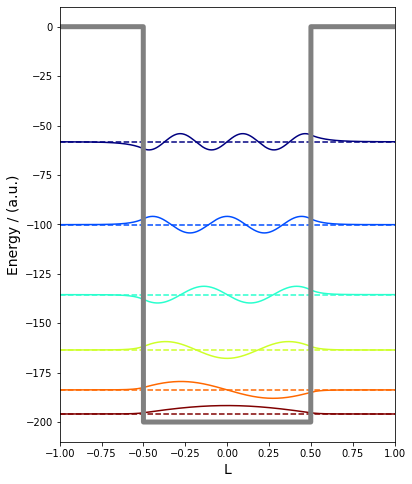

In [35]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, 100*v + E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.plot(xvec, U, c='gray', lw=5)
ax.set_xlim(xvec[0], xvec[-1])
#x.set_ylim(-E[0], E[n])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

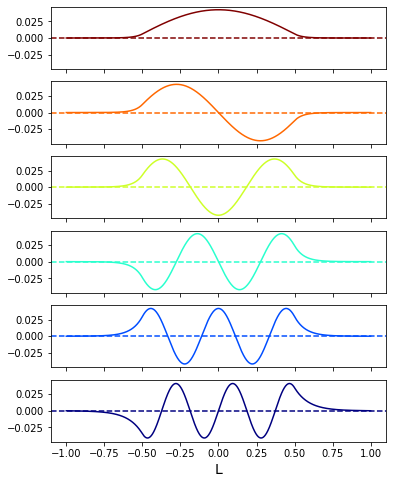

In [38]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

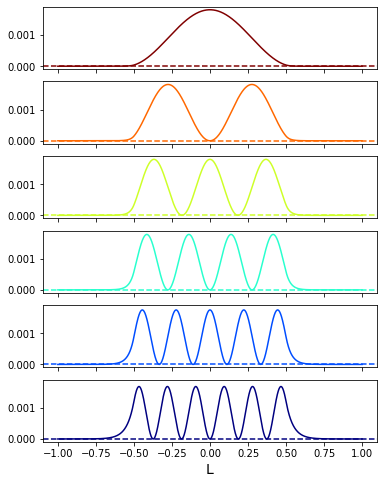

In [39]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v**2, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

### Preguntas
1. Explica brevemente cómo difiere este modelo del que hemos visto anteriormente.
2. ¿Puede ocupar el sistema estados fuera de las paredes del potencial?
3. Varía la profundidad del potencial y explica los resultados.
4. Calcula la densidad de probabilidad a partir de la función de